In [2]:
# R code for the assignment

# install necessary libraries
if(!requireNamespace("pacman",quietly = TRUE)){
  install.packages("pacman")
}
pacman :: p_load(ggplot2, corrplot,lmtest,qqplotr,coda,e1071,caret,MASS,dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


corrplot installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’



lmtest installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘iterators’, ‘DEoptimR’, ‘caTools’, ‘pracma’, ‘twosamples’, ‘doParallel’, ‘pbmcapply’, ‘foreach’, ‘robustbase’, ‘opdisDownsampling’, ‘qqconf’


Warning message in utils::install.packages(package, ...):
“installation of package ‘qqconf’ had non-zero exit status”
Warning message in utils::install.packages(package, ...):
“installation of package ‘qqplotr’ had non-zero exit status”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = 

In [3]:
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
#set a consistent them for ggplot2
theme_set(theme_minimal())

#Task1 : Preliminary Data Analysis

In [5]:
#1 data import and exploration
# 1.1 Import data
data_dir <- "Datasets" #specify your dataset folder path
read_data <- function(filename,path = data_dir){
  read.csv(file.path(path,filename), header = FALSE)
}

In [6]:
X_df <- as.matrix(read.csv("x.csv"))
colnames(X_df) <- c("x1","x3","x4","x5") #assign column to x

Y <- as.matrix(read.csv("y.csv"))
colnames(Y) <- c("x2") # Rename column to output

time <- read.csv("time.csv")
colnames(time) <- c("Time")

In [7]:
# 1.2 combine X and Y into single data frame
data <- data.frame(X_df, x2 = Y[,1]) # Combine features (X_df) and target (Y[,1]) into a single data frame

In [8]:
#1.3 Summary and structure (Useful for Initial Inspection)
#dataset overview
cat(" Dataset Overview\n")
cat(" Number of Rows: ", nrow(data), "\n")
cat(" Number of Columns: ", ncol(data), "\n")

 Dataset Overview
 Number of Rows:  9567 
 Number of Columns:  5 


In [9]:
#Summary statistics
cat("Summary Statistics\n")
print(summary(data)) # it is used to print the structured output

Summary Statistics
       x1              x3              x4               x5        
 Min.   : 1.81   Min.   :25.36   Min.   : 992.9   Min.   : 25.56  
 1st Qu.:13.51   1st Qu.:41.74   1st Qu.:1009.1   1st Qu.: 63.33  
 Median :20.35   Median :52.08   Median :1012.9   Median : 74.97  
 Mean   :19.65   Mean   :54.31   Mean   :1013.3   Mean   : 73.31  
 3rd Qu.:25.72   3rd Qu.:66.54   3rd Qu.:1017.3   3rd Qu.: 84.83  
 Max.   :37.11   Max.   :81.56   Max.   :1033.3   Max.   :100.16  
       x2       
 Min.   :420.3  
 1st Qu.:439.8  
 Median :451.5  
 Mean   :454.4  
 3rd Qu.:468.4  
 Max.   :495.8  


In [10]:
#Missing Values
cat("Missing Values Per Column\n")
print(colSums(is.na(data)))

Missing Values Per Column
x1 x3 x4 x5 x2 
 0  0  0  0  0 


In [11]:
#See 1st 5 rows
cat("Preview(First 5 Rows)\n")
print(head(data,5))# to print the top 5 data from the dataset

Preview(First 5 Rows)
     x1    x3      x4    x5     x2
1 23.64 58.49 1011.40 74.20 445.75
2 29.74 56.90 1007.15 41.91 438.76
3 19.07 49.69 1007.22 76.79 453.09
4 11.80 40.66 1017.13 97.20 464.43
5 13.97 39.16 1016.05 84.60 470.96


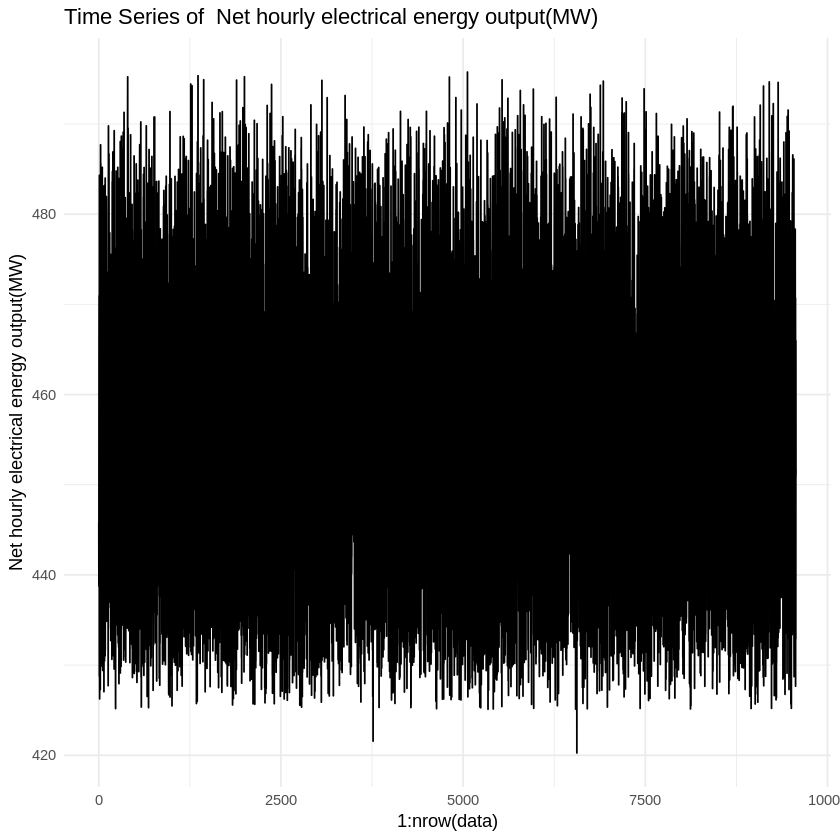

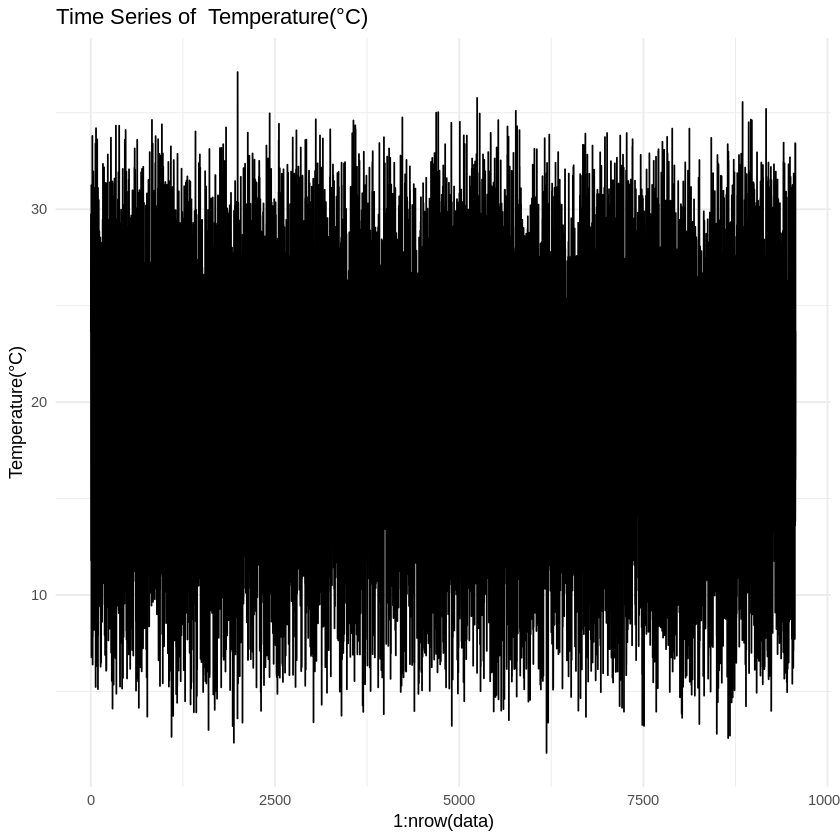

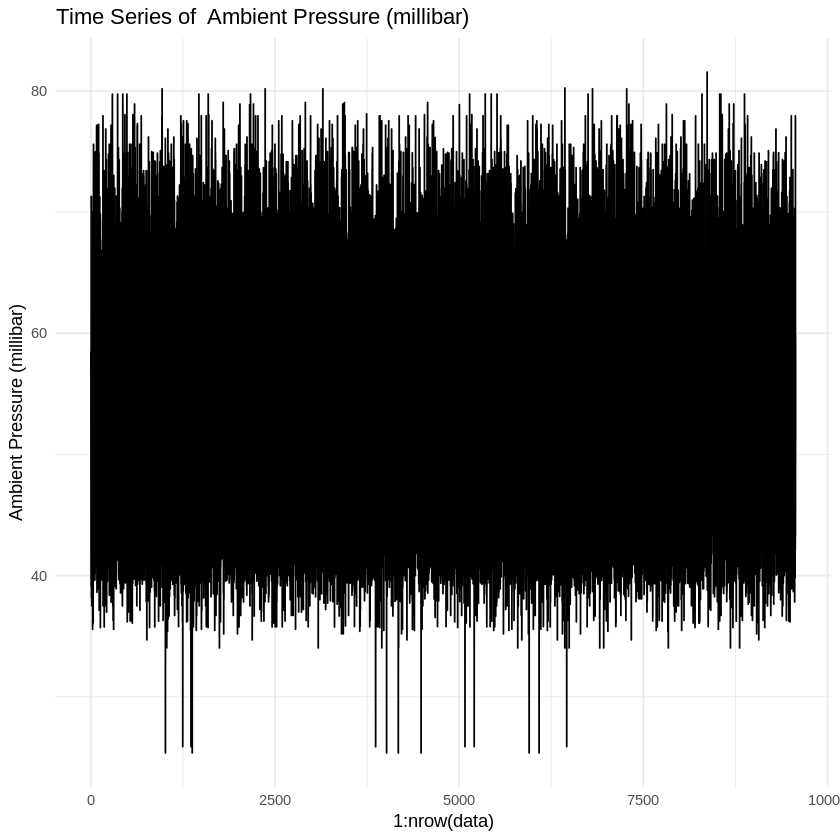

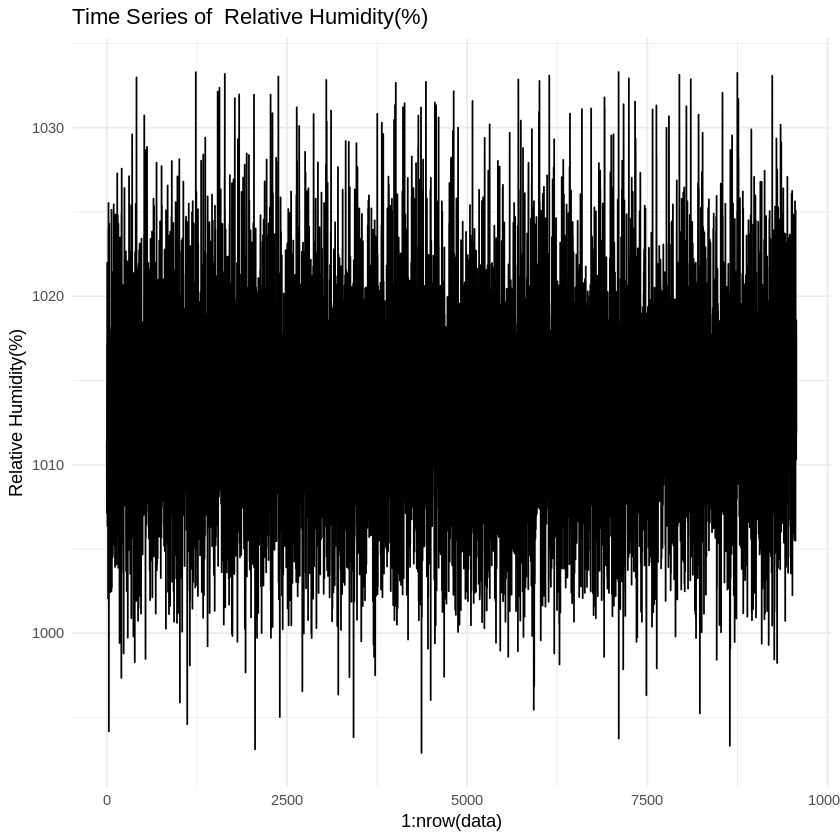

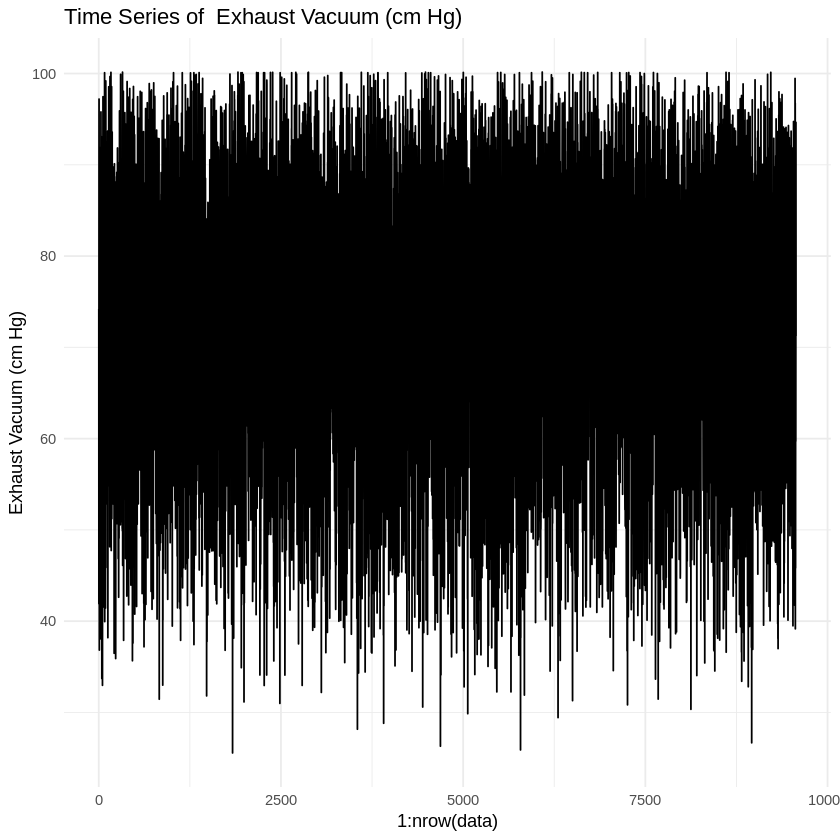

In [12]:
# 1.4 Time Series Plots
plot_time_series <- function(data,variable, var_name,xlab = "Index", ylab = var_name){
  ggplot(data, aes(x = 1:nrow(data), y= !!sym(variable))) + geom_line()+
    labs(title = paste("Time Series of ", var_name), X = xlab, y = ylab)
}

plot_time_series(data,"x2", "Net hourly electrical energy output(MW)")
plot_time_series(data, "x1","Temperature(°C)")
plot_time_series(data,"x3","Ambient Pressure (millibar)")
plot_time_series(data,"x4","Relative Humidity(%)")
plot_time_series(data,"x5", "Exhaust Vacuum (cm Hg)")

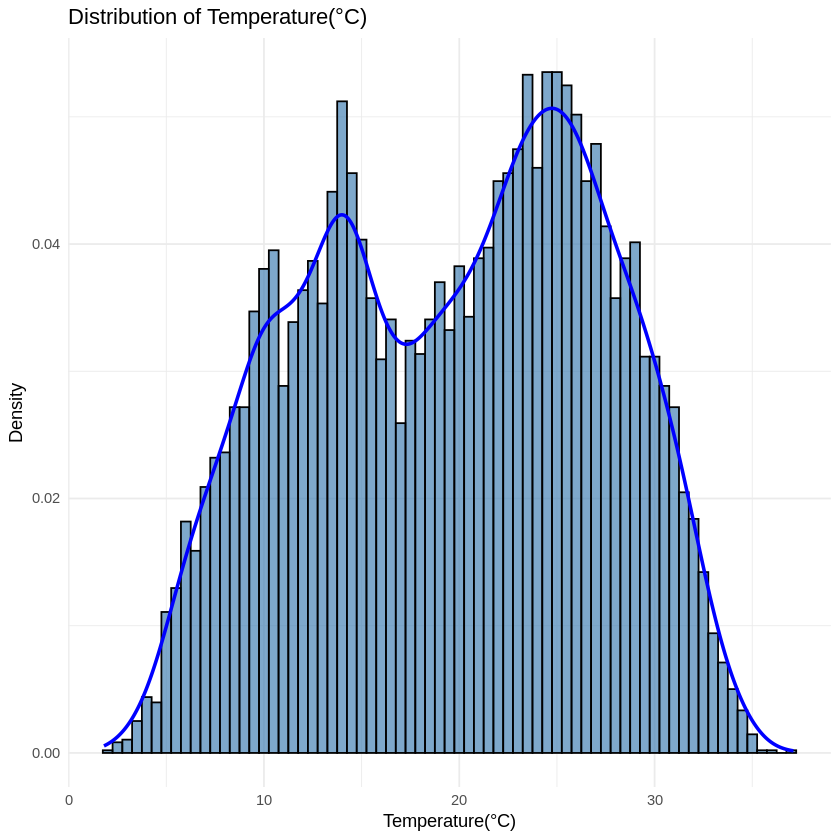

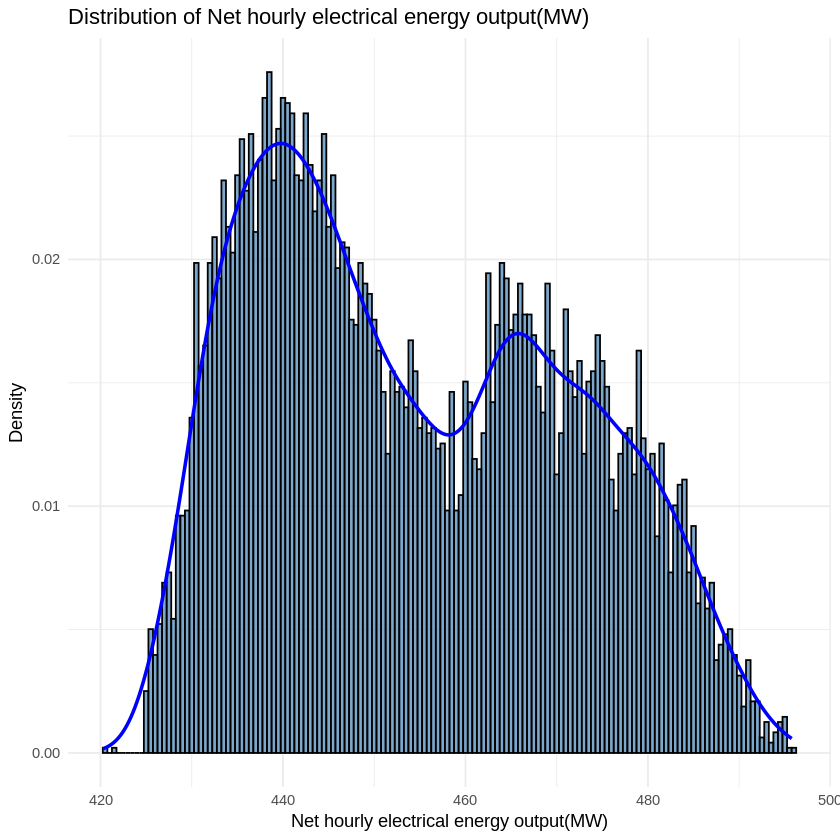

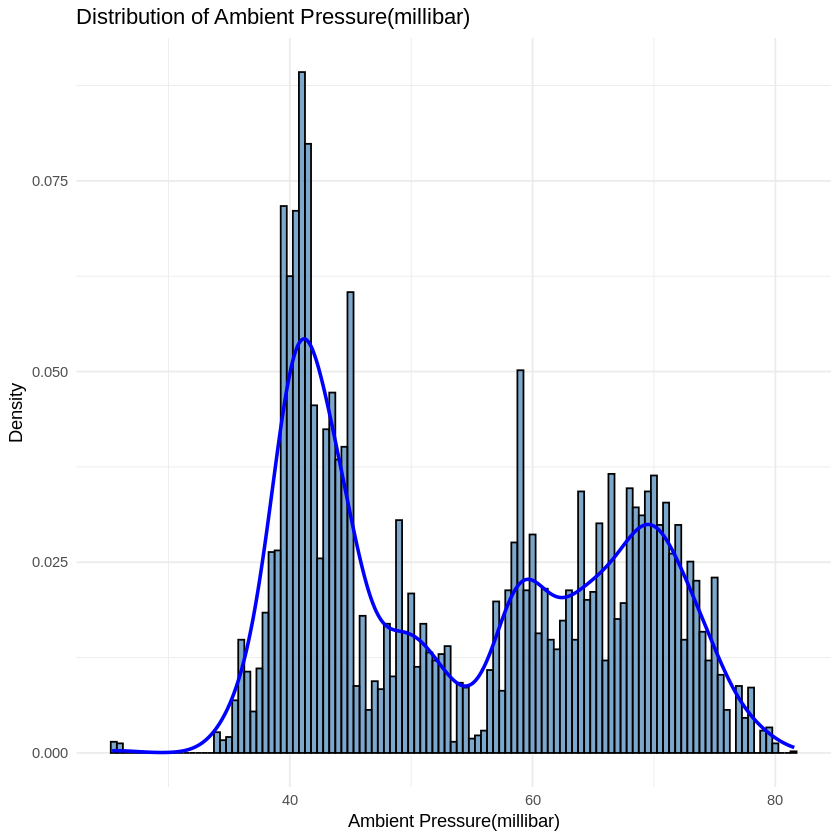

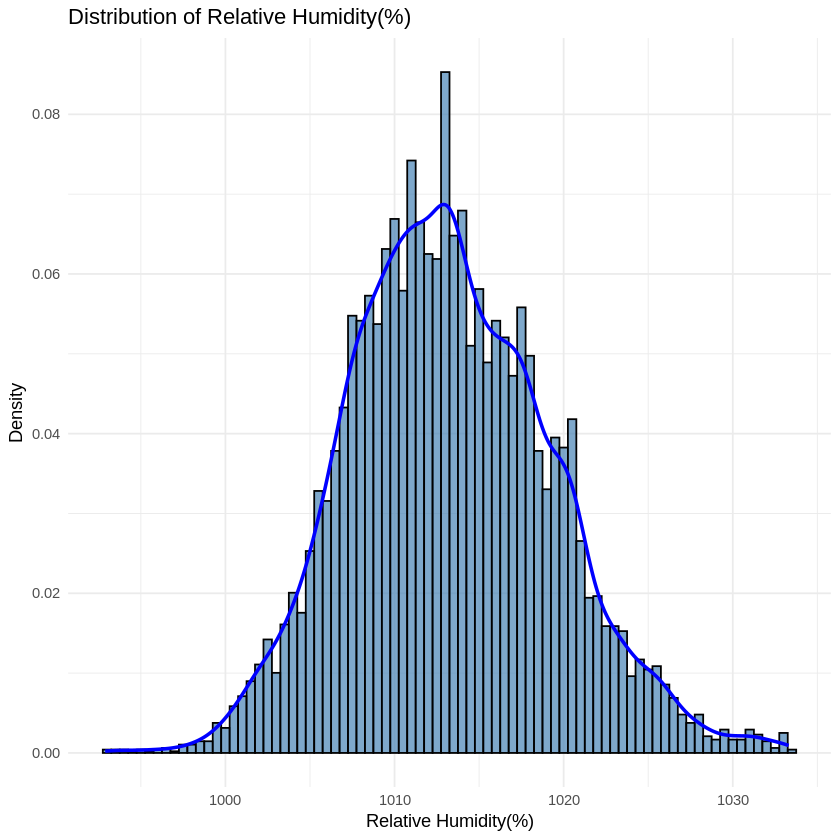

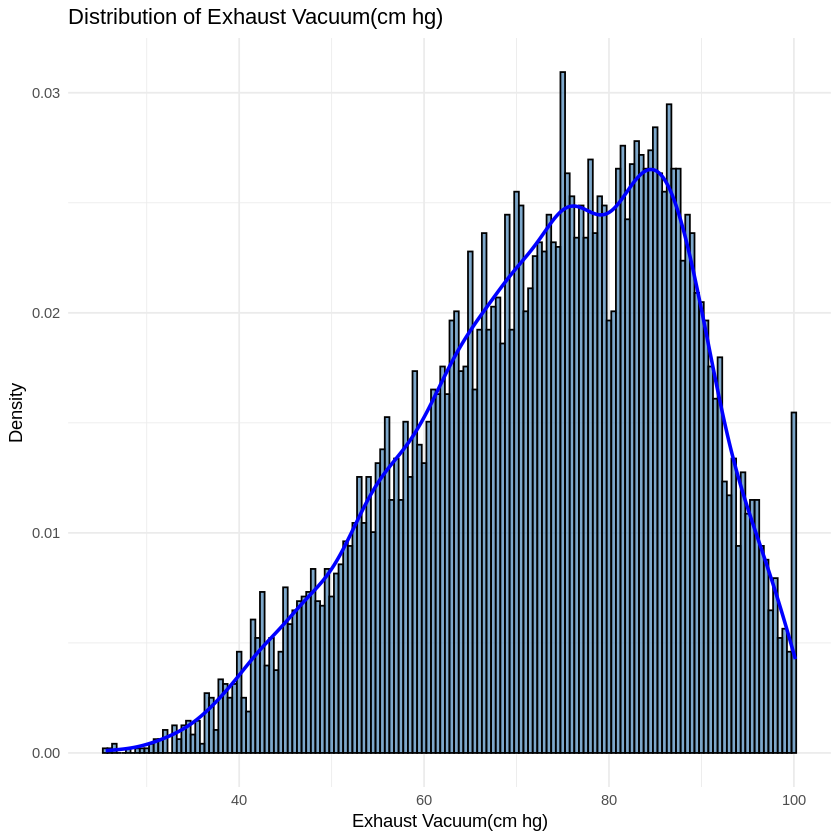

In [13]:
# 1.5 Distribution for Each Signal
plot_histogram_with_density <- function(data, variable, var_name, xlab = var_name, color = "steelblue", binwidth = NULL) {
  ggplot(data, aes(x = !!sym(variable))) +
    geom_histogram(aes(y = after_stat(density)), binwidth = binwidth, fill = color, color = "black", alpha = 0.7) +
    geom_density(color = "blue", lwd = 1) +
    labs(title = paste("Distribution of", var_name), x = xlab, y = "Density")
}

plot_histogram_with_density(data,"x1","Temperature(°C)",binwidth = 0.5)
plot_histogram_with_density(data,"x2","Net hourly electrical energy output(MW)",color = "steelblue",binwidth = 0.5)
plot_histogram_with_density(data,"x3","Ambient Pressure(millibar)",color = "steelblue",binwidth = 0.5)
plot_histogram_with_density(data,"x4","Relative Humidity(%)", color = "steelblue",binwidth = 0.5)
plot_histogram_with_density(data,"x5","Exhaust Vacuum(cm hg)", color = "steelblue",binwidth = 0.5)

[1] "Correlation Matrix:"
           x1         x3         x4         x5         x2
x1  1.0000000  0.8440894 -0.5076795 -0.5424556 -0.9481159
x3  0.8440894  1.0000000 -0.4135756 -0.3120998 -0.8697680
x4 -0.5076795 -0.4135756  1.0000000  0.0996307  0.5185621
x5 -0.5424556 -0.3120998  0.0996307  1.0000000  0.3896855
x2 -0.9481159 -0.8697680  0.5185621  0.3896855  1.0000000


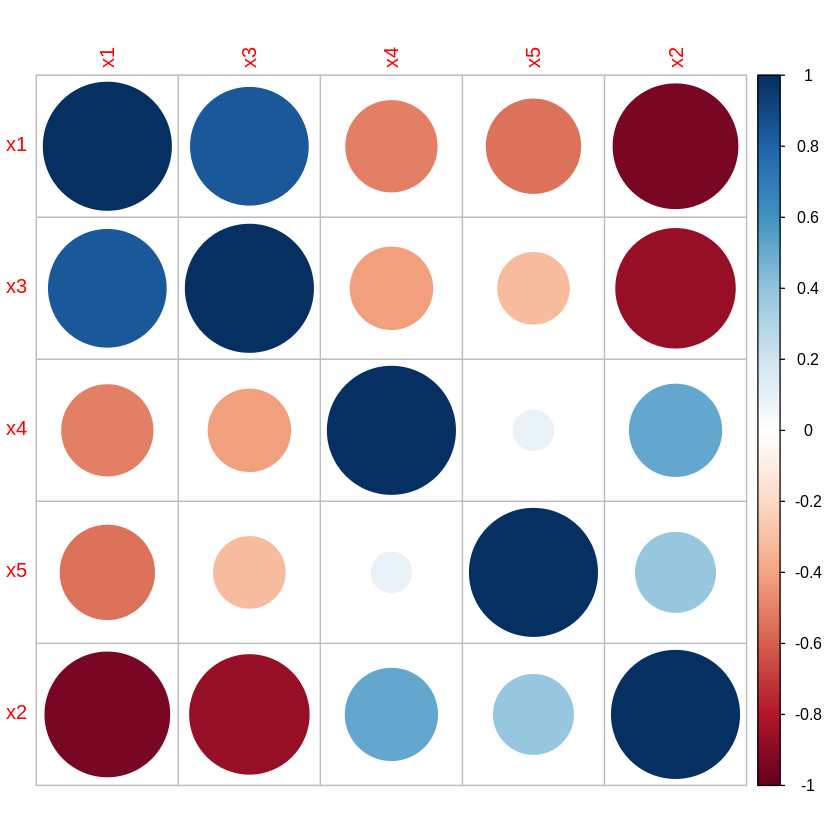

In [14]:
# 1.6. Correlation and scatter plots
# Correlation matrix
corr_matrix <- cor(data)
print("Correlation Matrix:")
print(corr_matrix)

corrplot(corr_matrix, method = "circle")

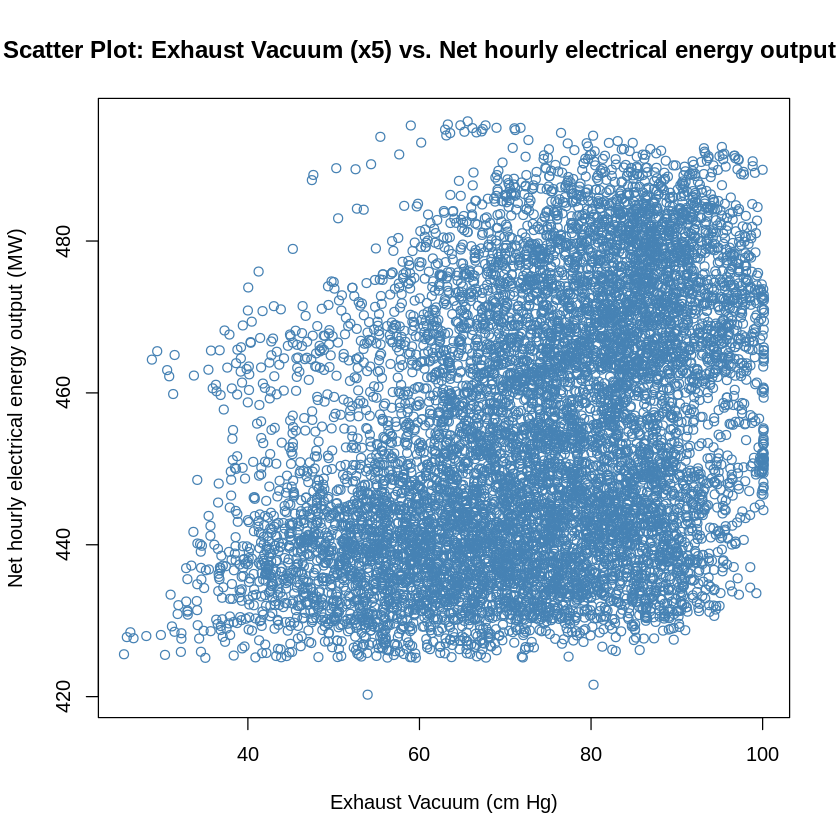

In [15]:
# Scatter Plot: Exhaust Vacuum (x5) vs. Net hourly electrical energy output (x2)
plot(data$x5, data$x2,
  main = "Scatter Plot: Exhaust Vacuum (x5) vs. Net hourly electrical energy output (x2)",
  xlab = "Exhaust Vacuum (cm Hg)",
  ylab = "Net hourly electrical energy output (MW)",
  col = "steelblue"
)

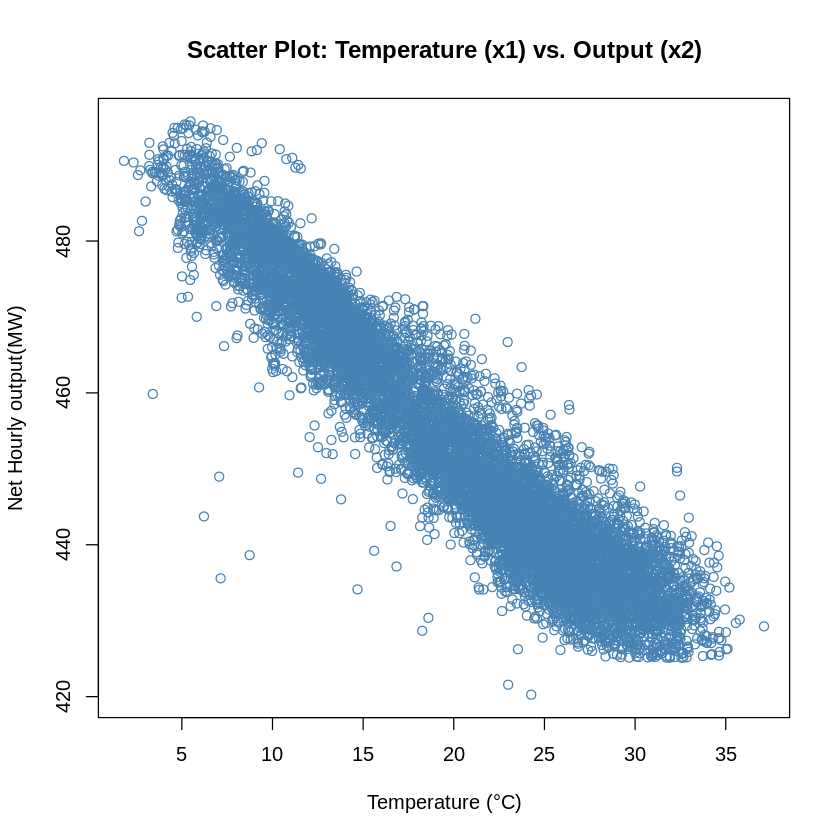

In [16]:
# Scatter Plot: Temperature (x1) vs. Output (x2)
plot(data$x1, data$x2,
  main = "Scatter Plot: Temperature (x1) vs. Output (x2)",
  ylab = "Net Hourly output(MW)",
  xlab = "Temperature (°C)",
  col = "steelblue"
)

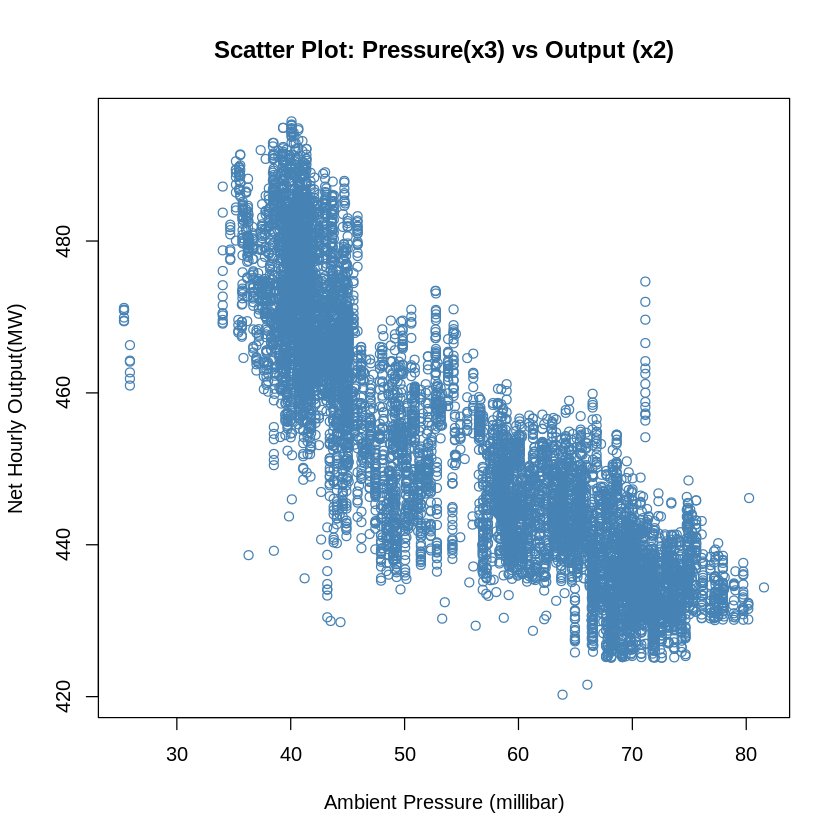

In [17]:
# Scatter Plot: Pressure(x3) vs Output (x2)
plot(data$x3, data$x2,
  main = "Scatter Plot: Pressure(x3) vs Output (x2)",
  xlab = "Ambient Pressure (millibar)",
  ylab = "Net Hourly Output(MW)",
  col = "steelblue"
)

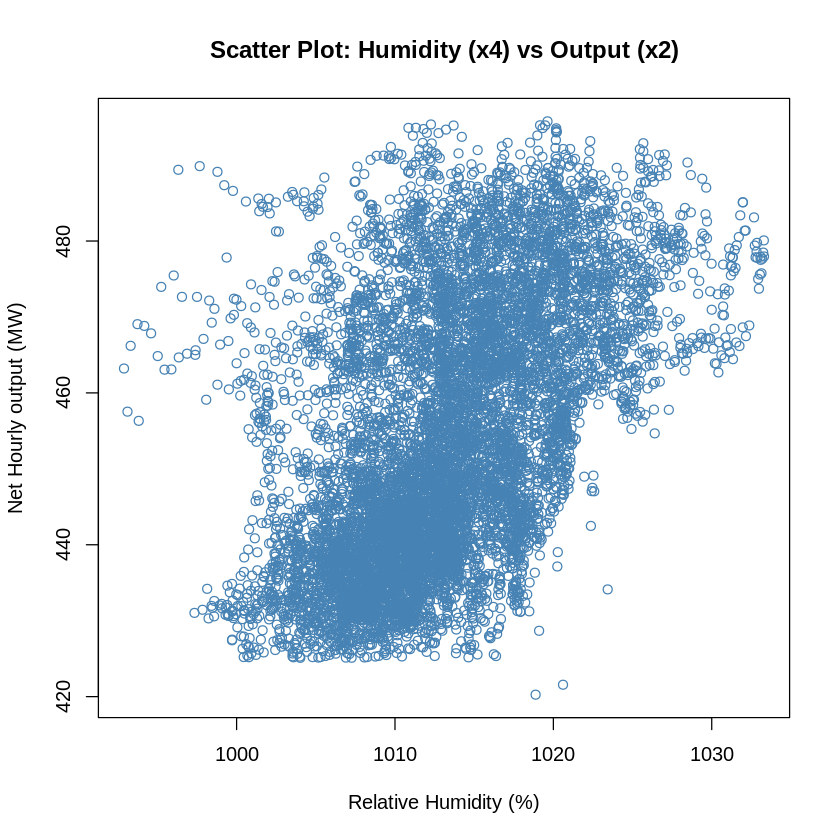

In [18]:
# Scatter Plot: Humidity (x4) vs Output (x2)
plot(data$x4, data$x2,
  main = "Scatter Plot: Humidity (x4) vs Output (x2)",
  xlab = "Relative Humidity (%)",
  ylab = "Net Hourly output (MW)",
  col = "steelblue"
)

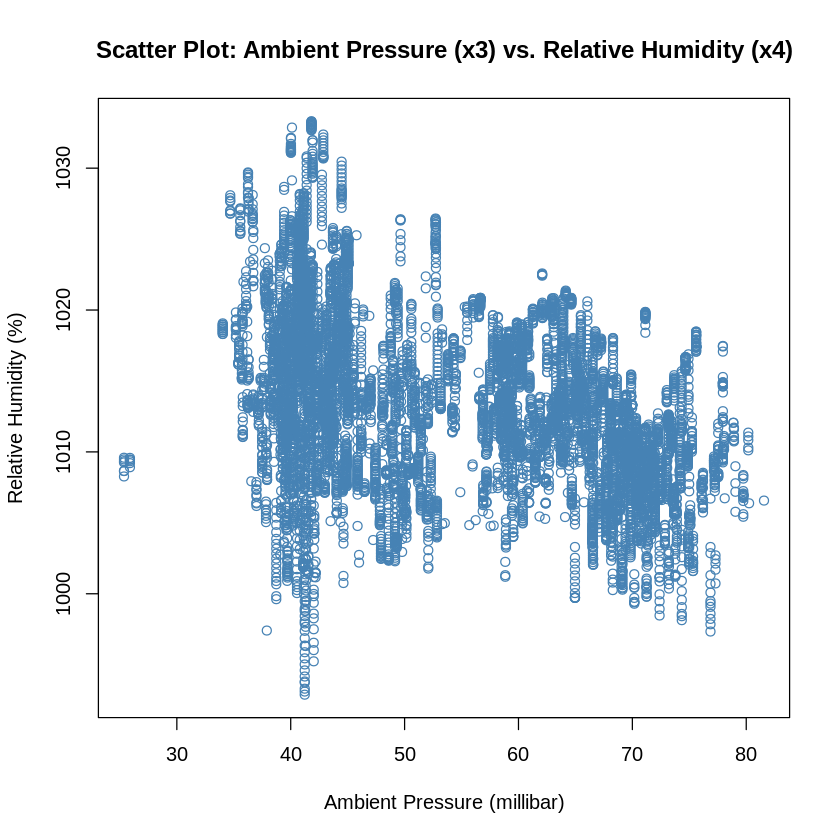

In [19]:
# Scatter Plot: Ambient Pressure (x3) vs. Relative Humidity (x4)
plot(data$x3, data$x4,
  main = "Scatter Plot: Ambient Pressure (x3) vs. Relative Humidity (x4)",
  xlab = "Ambient Pressure (millibar)",
  ylab = "Relative Humidity (%)",
  col = "steelblue"
)

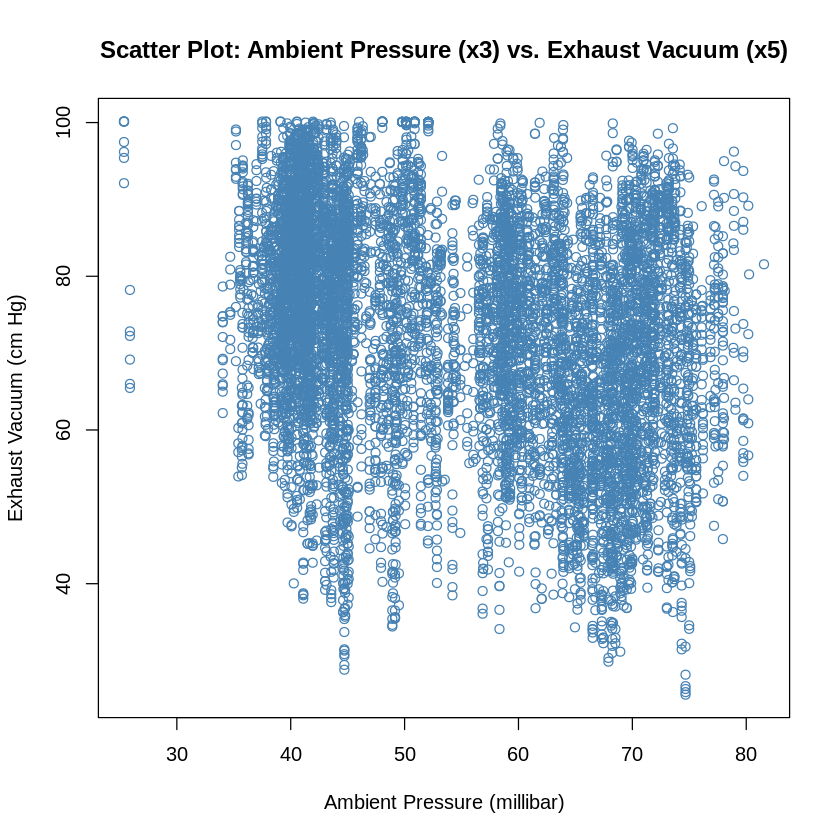

In [20]:
# Scatter Plot: Ambient Pressure (x3) vs. Exhaust Vacuum (x5)
plot(data$x3, data$x5,
  main = "Scatter Plot: Ambient Pressure (x3) vs. Exhaust Vacuum (x5)",
  xlab = "Ambient Pressure (millibar)",
  ylab = "Exhaust Vacuum (cm Hg)",
  col = "steelblue"
)

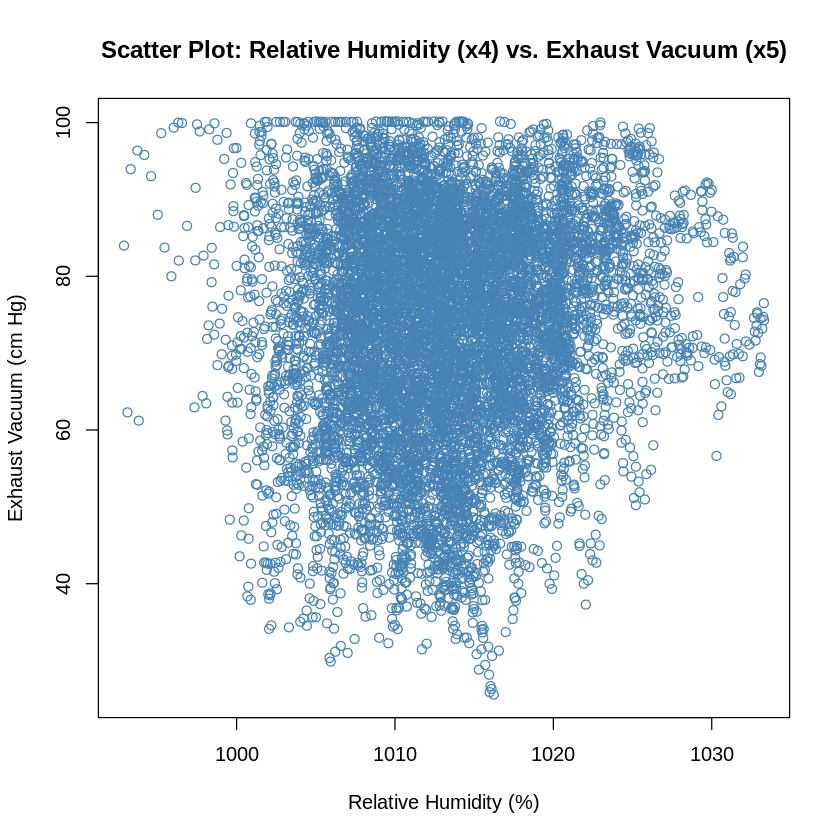

In [21]:
# Scatter Plot: Relative Humidity (x4) vs. Exhaust Vacuum (x5)
plot(data$x4, data$x5,
  main = "Scatter Plot: Relative Humidity (x4) vs. Exhaust Vacuum (x5)",
  xlab = "Relative Humidity (%)",
  ylab = "Exhaust Vacuum (cm Hg)",
  col = "steelblue"
)

# Task2 : Regression- Modelling the Relationship

In [22]:
# Define the candidate models (using a list for better organization)
models <- list(
  model1 = function(X, theta) {
    theta[1] * X$x4 + theta[2] * X$x3_sq + theta[3]
  },
  model2 = function(X, theta) {
    theta[1] * X$x4 + theta[2] * X$x3_sq + theta[3] * X$x5 + theta[4]
  },
  model3 = function(X, theta) {
    theta[1] * X$x3 + theta[2] * X$x4 + theta[3] * X$x5_cubed
  },
  model4 = function(X, theta) {
    theta[1] * X$x4 + theta[2] * X$x3_sq + theta[3] * X$x5_cubed + theta[4]
  },
  model5 = function(X, theta) {
    theta[1] * X$x4 + theta[2] * X$x1_sq + theta[3] * X$x3_sq + theta[4]
  }
)

In [23]:
#2.1 Estimate model parameters (theta) using Least Squares (with Ridge Regularization)
X <- as.data.frame(X_df) # Convert X to data frame if it's a matrix (ensure original X_df is preserved)
y <- Y[, 1]
estimate_theta_ridge <- function(X, y, lambda = 1e-5) {
  X_with_bias <- cbind(1, as.matrix(X)) # Add a column of 1s for the bias term
  XtX <- t(X_with_bias) %*% X_with_bias # Compute X^T * X
  XtX_reg <- XtX + lambda * diag(ncol(XtX)) # Add regularization term (lambda * I)
  theta <- MASS::ginv(XtX_reg) %*% t(X_with_bias) %*% y # Use generalized inverse to solve
  return(theta)
}

In [24]:
# Prepare data and estimate parameters for each model
model_data <- list(
  model1 = data.frame(x4 = X$x4, x3_sq = X$x3^2),
  model2 = data.frame(x4 = X$x4, x3_sq = X$x3^2, x5 = X$x5),
  model3 = data.frame(x3 = X$x3, x4 = X$x4, x5_cubed = X$x5^3),
  model4 = data.frame(x4 = X$x4, x3_sq = X$x3^2, x5_cubed = X$x5^3),
  model5 = data.frame(x4 = X$x4, x1_sq = X$x1^2, x3_sq = X$x3^2)
)

theta_list <- lapply(names(models), function(model_name) {
  X_model <- model_data[[model_name]]
  theta <- estimate_theta_ridge(X_model, y)
  print(paste("Theta for", model_name, ":"))
  print(theta)
  return(theta)
})
names(theta_list) <- names(models) # Name the theta list for easy access

[1] "Theta for model1 :"
              [,1]
[1,]  0.0004686591
[2,]  0.4775122446
[3,] -0.0094766515
[1] "Theta for model2 :"
              [,1]
[1,]  0.0004582755
[2,]  0.4636879209
[3,] -0.0089681284
[4,]  0.1695132061
[1] "Theta for model3 :"
             [,1]
[1,] 4.296011e-04
[2,] 2.652203e-02
[3,] 4.349730e-01
[4,] 2.777428e-05
[1] "Theta for model4 :"
              [,1]
[1,]  4.621418e-04
[2,]  4.713279e-01
[3,] -8.968252e-03
[4,]  1.066178e-05
[1] "Theta for model5 :"
              [,1]
[1,]  0.0004657355
[2,]  0.4744179346
[3,] -0.0339168496
[4,] -0.0036552100


In [25]:
# 2.2 Compute Residual Sum of Squared Errors (RSS)
compute_rss <- function(X, y, theta, model) {
  y_pred <- model(X, theta) # Predict the values using the model
  rss <- sum((y - y_pred)^2) # Compute the Residual Sum of Squared Errors
  return(rss)
}

rss_list <- lapply(names(models), function(model_name) {
  X_model <- model_data[[model_name]]
  theta <- theta_list[[model_name]]
  rss <- compute_rss(X_model, y, theta, models[[model_name]])
  print(paste("RSS for", model_name, ":"))
  print(rss)
  return(rss)
})
names(rss_list) <- names(models)
# 2.3 Compute Log-Likelihood and Variance
compute_log_likelihood_and_variance <- function(rss, n) {
  sigma_squared <- rss / (n - 1) # Estimate of the variance (using n-1 for unbiased estimate)
  log_likelihood <- -(n / 2) * log(2 * pi) - (n / 2) * log(sigma_squared) - (1 / (2 * sigma_squared)) * rss
  return(list(log_likelihood = log_likelihood, variance = sigma_squared))
}

likelihood_variance_list <- lapply(names(rss_list), function(model_name) {
  rss <- rss_list[[model_name]]
  results <- compute_log_likelihood_and_variance(rss, length(y))
  print(paste("Log-Likelihood for", model_name, ":", results$log_likelihood))
  print(paste("Variance for", model_name, ":", results$variance))
  return(results)
})
names(likelihood_variance_list) <- names(models)

[1] "RSS for model1 :"
[1] 14751333333
[1] "RSS for model2 :"
[1] 13656123200
[1] "RSS for model3 :"
[1] 4.429278e+14
[1] "RSS for model4 :"
[1] 135060108950
[1] "RSS for model5 :"
[1] 1299002310
[1] "Log-Likelihood for model1 : -81732.801227431"
[1] "Variance for model1 : 1542058.67999547"
[1] "Log-Likelihood for model2 : -81363.7758858526"
[1] "Variance for model2 : 1427568.80616233"
[1] "Log-Likelihood for model3 : -131049.865751713"
[1] "Variance for model3 : 46302294998.1562"
[1] "Log-Likelihood for model4 : -92325.3188429583"
[1] "Variance for model4 : 14118765.3094541"
[1] "Log-Likelihood for model5 : -70110.1544870861"
[1] "Variance for model5 : 135793.676536052"


In [26]:
# 2.4 Compute AIC and BIC
compute_aic <- function(log_likelihood, k) {
  aic <- 2 * k - 2 * log_likelihood # Calculate AIC
  return(aic)
}

compute_bic <- function(log_likelihood, k, n) {
  bic <- k * log(n) - 2 * log_likelihood # Calculate BIC
  return(bic)
}

aic_bic_list <- lapply(names(models), function(model_name) {
  log_likelihood <- likelihood_variance_list[[model_name]]$log_likelihood
  k <- length(theta_list[[model_name]])
  n <- length(y)
  aic <- compute_aic(log_likelihood, k)
  bic <- compute_bic(log_likelihood, k, n)
  print(paste("AIC for", model_name, ":", aic))
  print(paste("BIC for", model_name, ":", bic))
  return(list(AIC = aic, BIC = bic))
})
names(aic_bic_list) <- names(models)

[1] "AIC for model1 : 163471.602454862"
[1] "BIC for model1 : 163493.100679729"
[1] "AIC for model2 : 162735.551771705"
[1] "BIC for model2 : 162764.216071528"
[1] "AIC for model3 : 262107.731503427"
[1] "BIC for model3 : 262136.395803249"
[1] "AIC for model4 : 184658.637685917"
[1] "BIC for model4 : 184687.301985739"
[1] "AIC for model5 : 140228.308974172"
[1] "BIC for model5 : 140256.973273995"


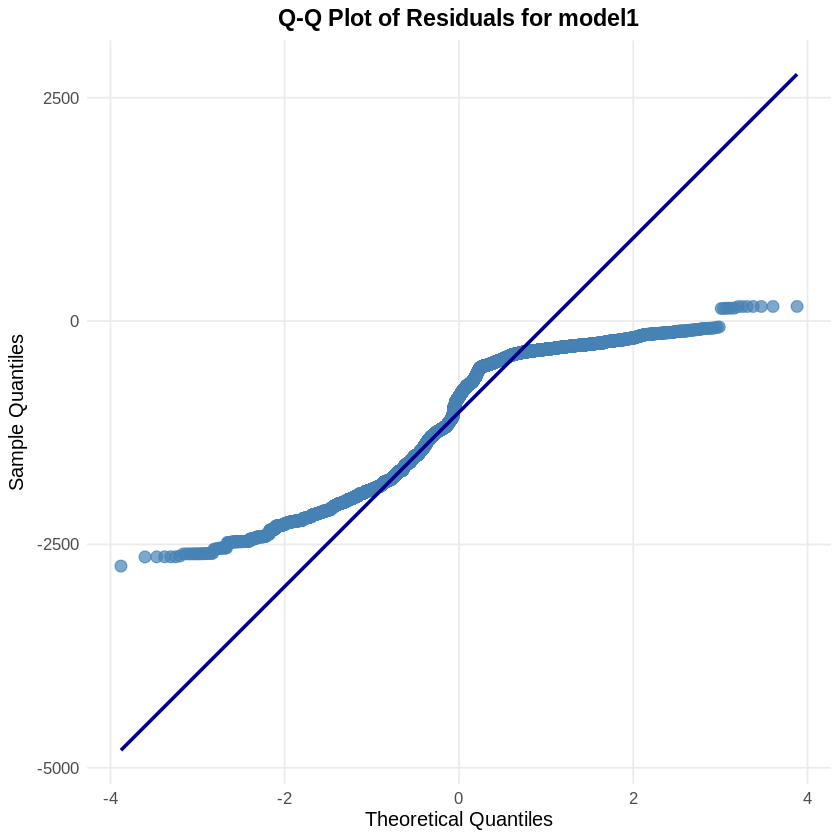

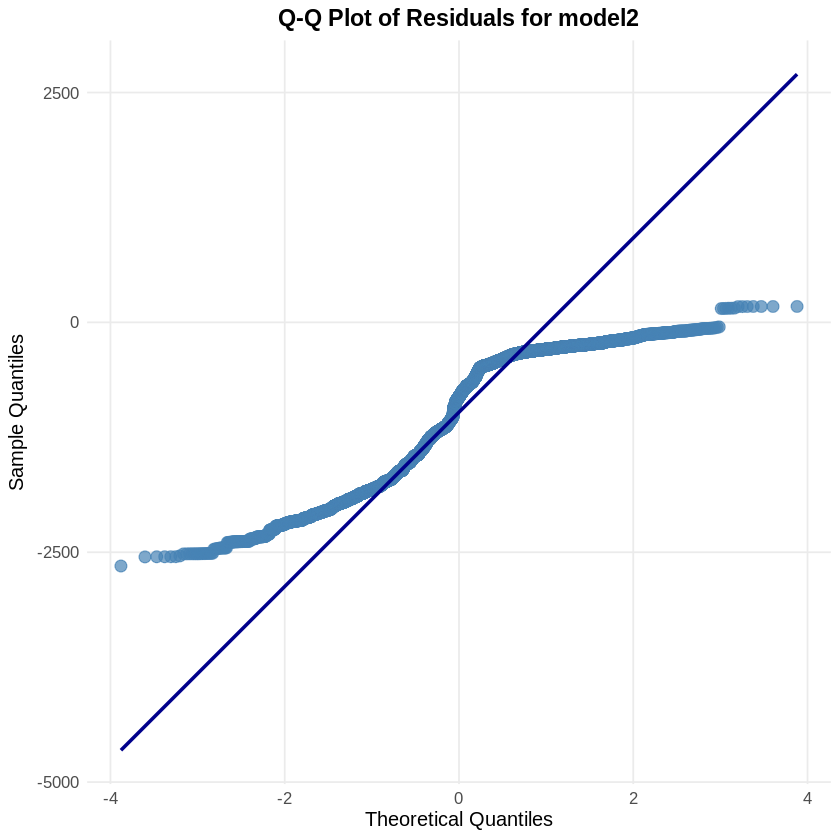

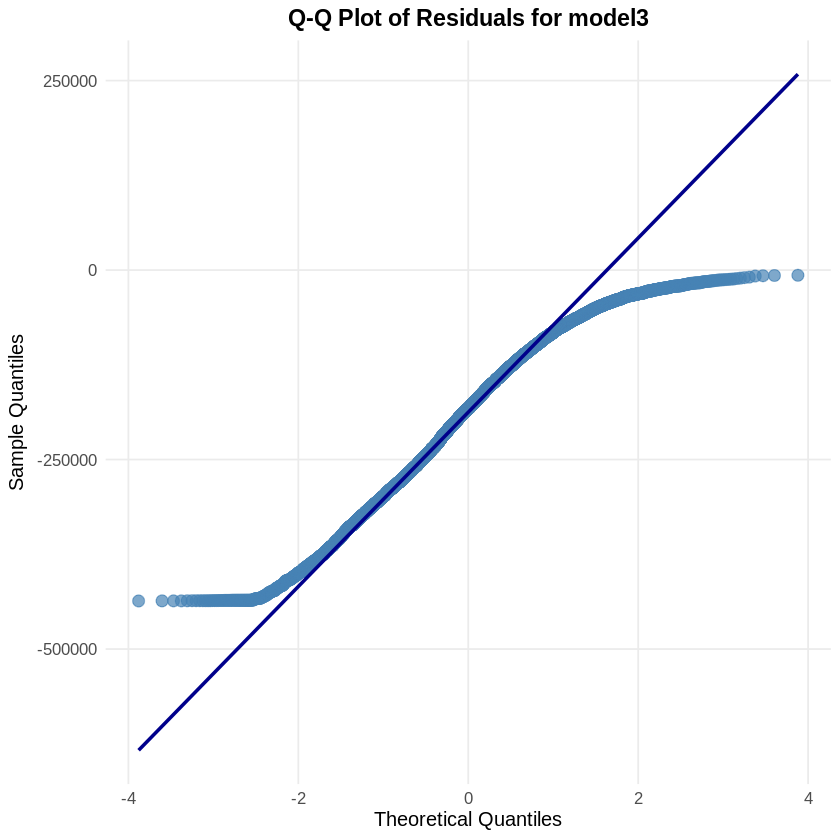

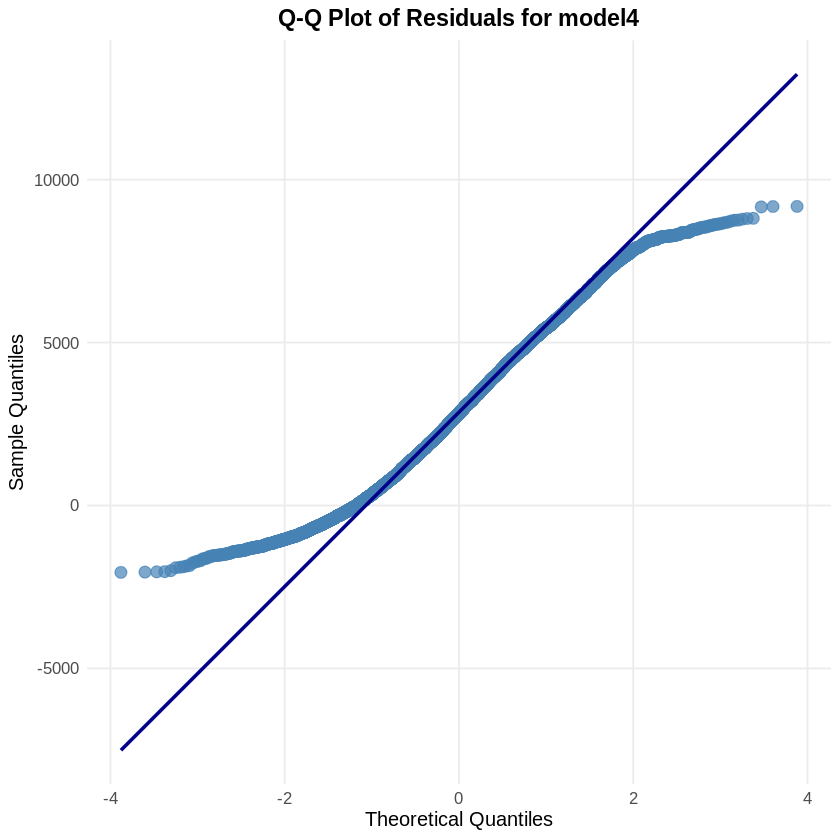

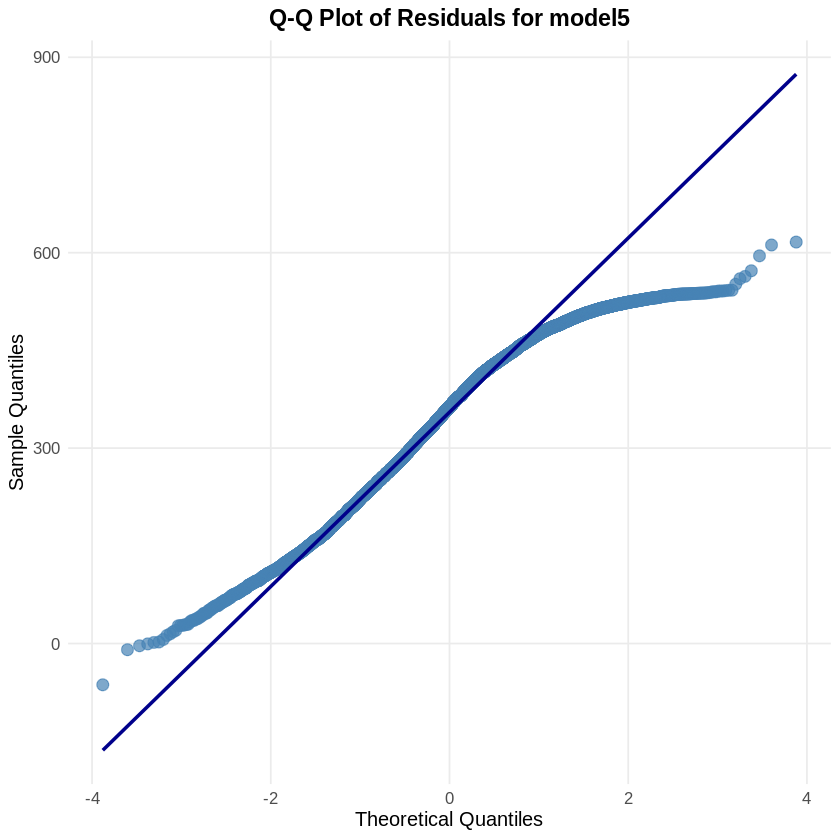

In [27]:
# 2.5 Checking the Distribution of Model Prediction Errors (Residuals)
# Function to plot Q-Q plot for residuals
library(ggplot2)
plot_qq_residuals <- function(y_true, y_pred, model_name) {
  residuals <- y_true - y_pred

  ggplot(data.frame(residuals = residuals), aes(sample = residuals)) +
    stat_qq(color = "steelblue", size = 3, alpha = 0.7) + # Customize points
    stat_qq_line(color = "darkblue", linewidth = 1) +             # Customize line
    labs(
      title = paste("Q-Q Plot of Residuals for", model_name),
      x = "Theoretical Quantiles",
      y = "Sample Quantiles"
    ) +
    theme_minimal() +                                       # Clean theme
    theme(
      plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), # Center title, style
      axis.title = element_text(size = 12),
      axis.text = element_text(size = 10),
      panel.grid.minor = element_blank()                   # Remove minor gridlines
    )
}

# Generate predictions for each model
predictions_list <- lapply(names(models), function(model_name) {
  X_model <- model_data[[model_name]]
  theta <- theta_list[[model_name]]
  predictions <- models[[model_name]](X_model, theta)
  return(predictions)
})
names(predictions_list) <- names(models)

# Plot Q-Q plots for each model's residuals
# Assuming 'models', 'model_data', 'theta_list', and 'y' are defined elsewhere
for (model_name in names(models)) {
  print(plot_qq_residuals(y, predictions_list[[model_name]], model_name))
}

In [28]:
# 2.7 Train-Test Split and Evaluation of the Best Model (Model 5)
# Data Preparation and Split
# Prepare data for Model 5
X <- data.frame(x1 = data$x1, x3 = data$x3, x4 = data$x4)
Y <- data.frame(x2 = data$x2)

X_best <- data.frame(x4 = X$x4, x1_squared = X$x1^2, x3_squared = X$x3^2)
y <- Y[, 1] # Ensure y is a vector

# Split data into training and testing sets (70% training, 30% testing)
set.seed(42)
n <- length(y)
train_size <- floor(0.70 * n)
train_index <- sample(1:n, train_size, replace = FALSE)

X_train <- X_best[train_index, ]
X_test <- X_best[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]

In [29]:
# Z-normalization
X_train_scaled <- scale(X_train)
X_test_scaled <- scale(X_test,
                       center = attr(X_train_scaled, "scaled:center"),
                       scale = attr(X_train_scaled, "scaled:scale"))

X_train <- as.data.frame(X_train_scaled)
X_test <- as.data.frame(X_test_scaled)

In [30]:
# Debugging print statements
print(paste("Rows in X_train:", nrow(X_train), "Length of y_train:", length(y_train)))
print(paste("Rows in X_test:", nrow(X_test), "Length of y_test:", length(y_test)))
str(X_train)
str(X_test)

# Plotting the distribution of training data with density curves
library(ggplot2)
library(gridExtra)
library(dplyr)
library(tidyr)

[1] "Rows in X_train: 6696 Length of y_train: 6696"
[1] "Rows in X_test: 2871 Length of y_test: 2871"
'data.frame':	6696 obs. of  3 variables:
 $ x4        : num  0.868 -1.227 2.711 0.722 0.284 ...
 $ x1_squared: num  -0.56 1.719 -1.231 -0.886 -0.057 ...
 $ x3_squared: num  -0.877 1.037 -0.95 -0.943 0.842 ...
'data.frame':	2871 obs. of  3 variables:
 $ x4        : num  -0.844 -1.153 -0.382 -0.703 0.692 ...
 $ x1_squared: num  0.161 1.229 1.431 -1.287 -0.532 ...
 $ x3_squared: num  1.389 1.131 1.265 -1.197 -0.786 ...



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


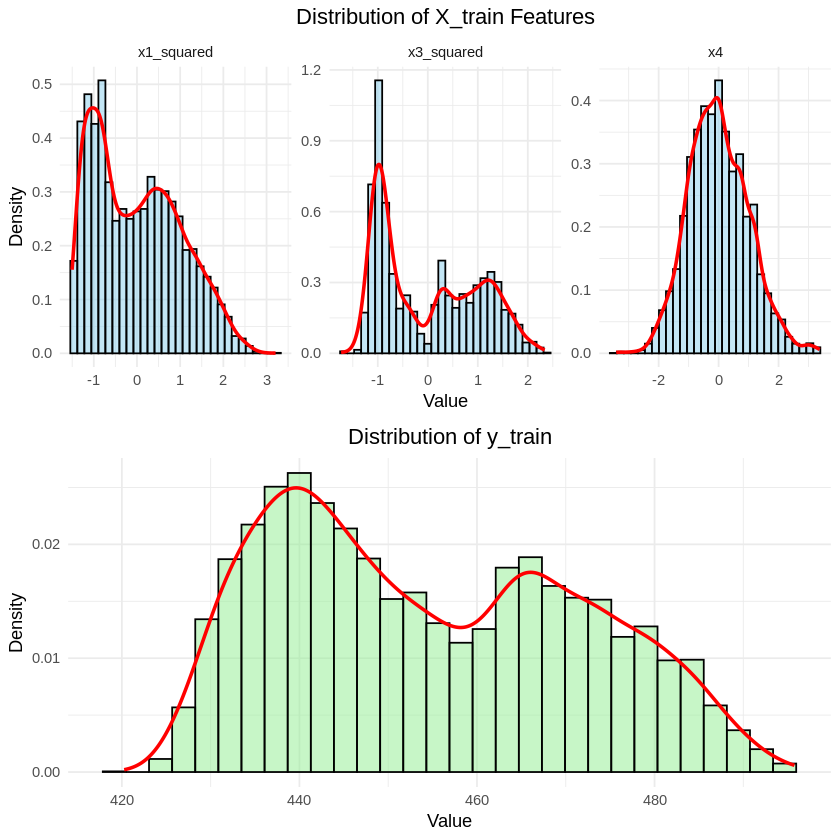

In [31]:
# Function to plot histograms and density curves for a dataframe
plot_hist_density <- function(df, y_train, df_name = "Data") {
  plots <- list()

  df_long <- df %>%
    pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

  plots[["X_train"]] <- ggplot(df_long, aes(x = value)) +
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black", alpha = 0.5) +
    geom_density(color = "red", size = 1) +
    facet_wrap(~variable, scales = "free") +
    labs(title = paste("Distribution of X_train Features"),
         x = "Value",
         y = "Density") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  plots[["y_train"]] <- ggplot(data.frame(y_train = y_train), aes(x = y_train)) +
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightgreen", color = "black", alpha = 0.5) +
    geom_density(color = "red", size = 1) +
    labs(title = "Distribution of y_train",
         x = "Value",
         y = "Density") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  return(plots)
}
hist_density_plots <- plot_hist_density(X_train, y_train, "Training Data")
# Display the plots
grid.arrange(grobs = hist_density_plots, nrow = 2)

In [32]:
# Model Fitting: Least Squares Estimation

# Add intercept term to the training data
X_train_bias <- cbind(1, as.matrix(X_train))
colnames(X_train_bias)[1] <- "intercept"

In [33]:
# Least Squares estimation: theta = (X'X)^-1 X'y
X_transpose <- t(X_train_bias)
XTX <- X_transpose %*% X_train_bias
inverse_XTX <- solve(XTX)
XTY <- X_transpose %*% y_train
theta_hat <- inverse_XTX %*% XTY

In [34]:
# Predictions on Testing Data

# Add intercept term to testing data
X_test_bias <- cbind(1, as.matrix(X_test))
colnames(X_test_bias)[1] <- "intercept"

In [35]:
# Make predictions on the test set
y_pred_test <- X_test_bias %*% theta_hat

In [36]:
# Confidence Intervals for Predictions

# 95% Confidence Intervals
alpha <- 0.05
n_test <- nrow(X_test_bias)
p <- ncol(X_test_bias)

In [37]:
# Estimate variance (sigma^2) using training residuals
y_pred_train <- X_train_bias %*% theta_hat
residuals_train <- y_train - y_pred_train
sigma_squared <- sum(residuals_train^2) / (nrow(X_train_bias) - ncol(X_train_bias))

In [38]:
# Variance-covariance matrix of parameter estimates
cov_theta <- sigma_squared * inverse_XTX

In [39]:
# Standard errors for predictions
se_pred <- sqrt(diag(X_test_bias %*% cov_theta %*% t(X_test_bias)) + sigma_squared)

In [40]:
# t-value for 95% CI
t_value <- qt(1 - alpha / 2, df = nrow(X_train_bias) - ncol(X_train_bias))

In [41]:
# Lower and upper bounds of confidence intervals
lower_bound <- y_pred_test - t_value * se_pred
upper_bound <- y_pred_test + t_value * se_pred

In [42]:
# Combine results into a data frame
results <- data.frame(
  index = 1:length(y_test),
  actual = y_test,
  predicted = y_pred_test,
  lower_ci = lower_bound,
  upper_ci = upper_bound
)
# Print results
print(head(results))

   index actual predicted lower_ci upper_ci
6      1 442.35  444.2230 432.0557 456.3904
10     2 435.29  433.9687 421.8051 446.1323
12     3 426.25  432.1912 420.0273 444.3550
13     4 480.66  473.3281 461.1625 485.4936
14     5 460.17  465.1219 452.9593 477.2846
20     6 464.82  464.2397 452.0770 476.4025


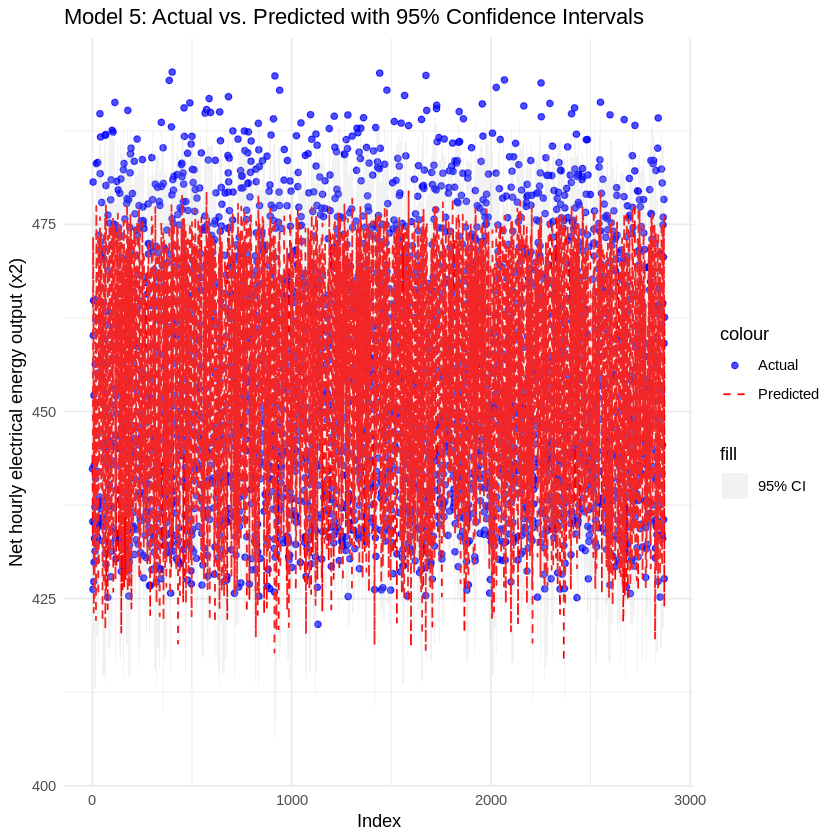

In [43]:
# Plot: Actual vs Predicted with Confidence Intervals
ggplot(results, aes(x = index)) +
  geom_point(aes(y = actual, color = "Actual"), alpha = 0.7) +
  geom_line(aes(y = predicted, color = "Predicted"), linetype = "dashed") +
  geom_ribbon(aes(ymin = lower_ci, ymax = upper_ci, fill = "95% CI"), alpha = 0.2) +
  labs(
    x = "Index",
    y = "Net hourly electrical energy output (x2)",
    title = "Model 5: Actual vs. Predicted with 95% Confidence Intervals"
  ) +
  scale_color_manual(values = c("Actual" = "blue", "Predicted" = "red")) +
  scale_fill_manual(values = c("95% CI" = "gray")) +
  theme_minimal()

In [44]:
# Model Evaluation Metrics

# RMSE, MAE, and R² Calculation

# Calculate residuals
residuals <- y_test - y_pred_test

# RMSE: Root Mean Squared Error
rmse <- sqrt(mean(residuals^2))

# MAE: Mean Absolute Error
mae <- mean(abs(residuals))

# R-squared (Coefficient of Determination)
ss_total <- sum((y_test - mean(y_test))^2)
ss_res <- sum(residuals^2)
r_squared <- 1 - (ss_res / ss_total)

# Print evaluation metrics
cat("Model Evaluation Metrics:\n")
cat(sprintf("RMSE: %.4f\n", rmse))
cat(sprintf("MAE: %.4f\n", mae))
cat(sprintf("R²: %.4f\n", r_squared))

Model Evaluation Metrics:
RMSE: 6.1368
MAE: 4.9260
R²: 0.8701


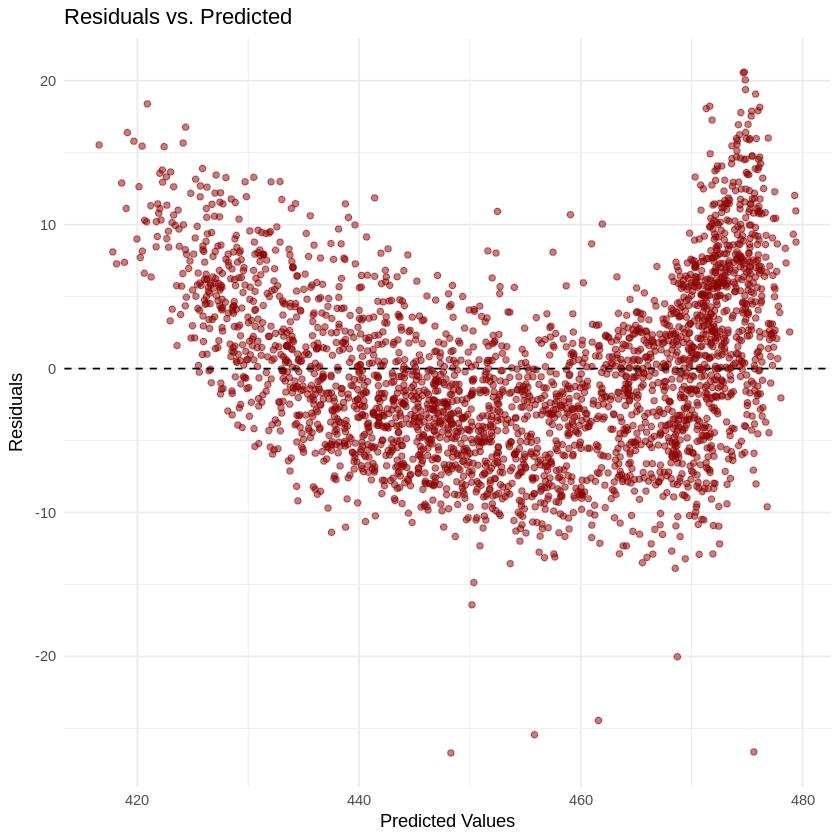

In [45]:
# Residual Analysis

# Residual Plot and Normality Test

# Residual plot vs. predicted values
ggplot(data.frame(predicted = y_pred_test, residuals = residuals), aes(x = predicted, y = residuals)) +
  geom_point(alpha = 0.5, color = "darkred") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(
    title = "Residuals vs. Predicted",
    x = "Predicted Values",
    y = "Residuals"
  ) +
  theme_minimal()


	Shapiro-Wilk normality test

data:  residuals
W = 0.98636, p-value = 5.41e-16


ERROR: Error: object 'theta_hat_best_model_train' not found


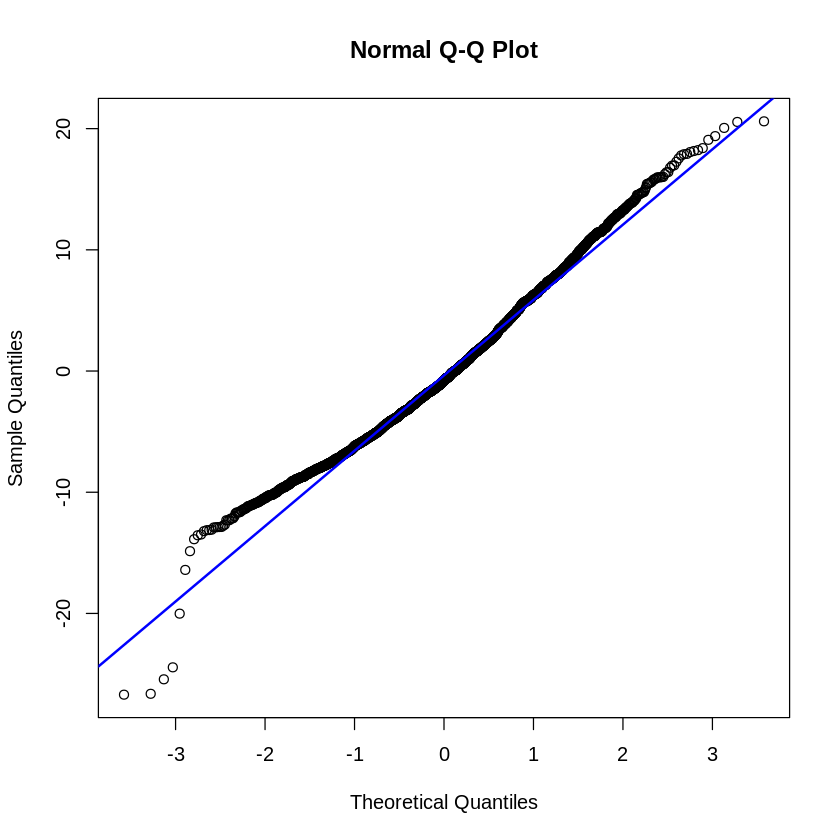

In [46]:
# Q-Q plot for residuals
qqnorm(residuals)
qqline(residuals, col = "blue", lwd = 2)

# Shapiro-Wilk Normality Test
shapiro.test(residuals)

# Store OLS coefficients and sigma_squared from the training phase for Task 3 (ABC)
ols_coefs_for_abc <- as.vector(theta_hat_best_model_train)
names(ols_coefs_for_abc) <- rownames(theta_hat_best_model_train) # Assign names to the coefficient vector
ols_sigma_sq_for_abc <- sigma_squared_best_model_est_train # Store estimated error variance

# --- Task 3: Approximate Bayesian Computation (ABC) - Refined ---

In [ ]:
# --- 3.1 Define the Model for Simulation (based on Model 5) ---
simulate_data_model5 <- function(X_data, theta, sigma_sq) {
  mu <- theta[1] +
    theta[2] * X_data$x4 +
    theta[3] * X_data$x1_squared +
    theta[4] * X_data$x3_squared
  y_sim <- rnorm(n = nrow(X_data), mean = mu, sd = sqrt(sigma_sq))
  return(y_sim)
}

In [ ]:
# --- 3.2 Define Priors for Parameters ---
# print("Summary of lm fit for Model 5 (for prior reference):")
# summary(best_model_trained)

prior_sampler <- function() {
  theta_sampled <- c(
    runif(1, 450, 600),
    runif(1, -0.3, 0.1),
    runif(1, -0.25, -0.05),
    runif(1, 0.0001, 0.0005)
  )
  sigma_sq_sampled <- runif(1, 15, 40)
  return(list(theta = theta_sampled, sigma_sq = sigma_sq_sampled))
}

In [ ]:
# --- 3.3 Choose Summary Statistics ---
calculate_summary_stats <- function(y_vector) {
  if (length(y_vector) == 0 || any(!is.finite(y_vector))) {
    return(c(mean = NA, var = NA))
  }
  return(c(mean = mean(y_vector, na.rm = TRUE), var = var(y_vector, na.rm = TRUE)))
}

S_obs <- calculate_summary_stats(y_train)
print("Observed Summary Statistics (from y_train):")
print(S_obs)

In [ ]:
# --- 3.4 Define Distance Metric ---
distance_metric <- function(S_sim, S_obs, scales = NULL) {
  if (any(is.na(S_sim)) || any(is.na(S_obs))) return(Inf)
  if (is.null(scales)) {
    scales <- rep(1, length(S_obs))
  } else {
    scales[scales <= 0] <- 1e-9
  }
  dist_sq <- sum(((S_sim - S_obs) / scales)^2, na.rm = TRUE)
  return(sqrt(dist_sq))
}

In [ ]:
# --- 3.5 Set ABC Parameters ---
N_simulations <- 200000
distance_scales <- abs(S_obs)
distance_scales[distance_scales == 0] <- mad(y_train, na.rm = TRUE)
if (any(is.na(distance_scales))) distance_scales <- c(mad(y_train), mad(y_train)^2)

print("Performing pilot run to determine epsilon...")
M_pilot <- 2000
pilot_distances <- numeric(M_pilot)
X_train_abc <- X_train

pb_pilot <- txtProgressBar(min = 0, max = M_pilot, style = 3)
for (k in 1:M_pilot) {
  params_candidate <- prior_sampler()
  y_sim_pilot <- simulate_data_model5(X_train_abc, params_candidate$theta, params_candidate$sigma_sq)
  if (length(y_sim_pilot) != nrow(X_train_abc) || any(!is.finite(y_sim_pilot))) {
    pilot_distances[k] <- Inf
    next
  }
  S_sim_pilot <- calculate_summary_stats(y_sim_pilot)
  pilot_distances[k] <- distance_metric(S_sim_pilot, S_obs, scales = distance_scales)
  setTxtProgressBar(pb_pilot, k)
}
close(pb_pilot)

finite_pilot_distances <- pilot_distances[is.finite(pilot_distances)]
if (length(finite_pilot_distances) > 0) {
  epsilon <- quantile(finite_pilot_distances, probs = 0.05, na.rm = TRUE)
} else {
  warning("Pilot run resulted in no finite distances. Check priors or simulation model. Setting a default epsilon.")
  epsilon <- 0.5
}
print(paste("Chosen Epsilon (tolerance):", signif(epsilon, 4)))
print(paste("Using N_simulations for ABC:", N_simulations))

In [ ]:
# --- 3.6 Run ABC Rejection Algorithm ---
accepted_parameters_list <- list()
accepted_distances_vec <- numeric(0)
n_accepted <- 0

print("Starting ABC Rejection Sampling...")
pb <- txtProgressBar(min = 0, max = N_simulations, style = 3)

for (i in 1:N_simulations) {
  params_candidate <- prior_sampler()
  y_sim <- simulate_data_model5(X_train_abc, params_candidate$theta, params_candidate$sigma_sq)
  if (length(y_sim) != nrow(X_train_abc) || any(!is.finite(y_sim))) {
    setTxtProgressBar(pb, i)
    next
  }
  S_sim <- calculate_summary_stats(y_sim)
  dist <- distance_metric(S_sim, S_obs, scales = distance_scales)
  if (!is.na(dist) && dist < epsilon) {
    n_accepted <- n_accepted + 1
    accepted_parameters_list[[n_accepted]] <- list(
      theta = params_candidate$theta,
      sigma_sq = params_candidate$sigma_sq
    )
    accepted_distances_vec[n_accepted] <- dist
  }
  setTxtProgressBar(pb, i)
}
close(pb)

print(paste("Finished ABC. Number of accepted samples:", n_accepted))
if (N_simulations > 0) {
  print(paste("Acceptance rate:", signif(n_accepted / N_simulations, 3)))
}
# --- Fit Model 5 (for comparison with ABC posterior) ---
best_model_trained <- lm(y_train ~ x4 + x1_squared + x3_squared, data = X_train)


# --- 3.7 Analyze Posterior Samples ---
if (n_accepted > 0) {
  posterior_df <- do.call(rbind, lapply(accepted_parameters_list, function(p) {
    c(p$theta, sigma_sq = p$sigma_sq)
  }))
  colnames(posterior_df) <- c("intercept", "coef_x4", "coef_x1_sq", "coef_x3_sq", "sigma_sq")
  posterior_df <- as.data.frame(posterior_df)

  print("Summary of Posterior Distributions:")
  summary(posterior_df)

  print("Plotting Posterior Distributions...")
  lm_coefs <- coef(best_model_trained)
  lm_sigma_sq <- summary(best_model_trained)$sigma^2

  par(mfrow = c(ceiling(ncol(posterior_df) / 2), 2), mar = c(4, 4, 2, 1))

  hist(posterior_df$intercept, main = "Posterior: Intercept", xlab = "Value", freq = FALSE, breaks = 30)
  lines(density(posterior_df$intercept), col = "blue", lwd = 2)
  abline(v = lm_coefs["(Intercept)"], col = "red", lwd = 2, lty = 2)
  legend("topright", legend = c("ABC Posterior", "LM Estimate"), col = c("blue", "red"), lty = c(1, 2), lwd = 2, bty = "n")

  hist(posterior_df$coef_x4, main = "Posterior: Coef for x4", xlab = "Value", freq = FALSE, breaks = 30)
  lines(density(posterior_df$coef_x4), col = "blue", lwd = 2)
  abline(v = lm_coefs["x4"], col = "red", lwd = 2, lty = 2)

  hist(posterior_df$coef_x1_sq, main = "Posterior: Coef for x1_squared", xlab = "Value", freq = FALSE, breaks = 30)
  lines(density(posterior_df$coef_x1_sq), col = "blue", lwd = 2)
  abline(v = lm_coefs["x1_squared"], col = "red", lwd = 2, lty = 2)

  hist(posterior_df$coef_x3_sq, main = "Posterior: Coef for x3_squared", xlab = "Value", freq = FALSE, breaks = 30)
  lines(density(posterior_df$coef_x3_sq), col = "blue", lwd = 2)
  abline(v = lm_coefs["x3_squared"], col = "red", lwd = 2, lty = 2)

  hist(posterior_df$sigma_sq, main = "Posterior: Sigma Squared", xlab = "Value", freq = FALSE, breaks = 30)
  lines(density(posterior_df$sigma_sq), col = "blue", lwd = 2)
  abline(v = lm_sigma_sq, col = "red", lwd = 2, lty = 2)

  par(mfrow = c(1, 1)) # Reset plotting parameters
} else {
  print("No accepted samples in ABC, cannot analyze posterior.")
}

# --- Task 4: Approximate Bayesian Computation (ABC) - Simplified

In [ ]:
# --- 4.1 Identify Two Parameters with Largest Absolute LS Estimates ---
# Refit the best model (Model 5) using lm for easy coefficient access
best_model_formula <- y_train ~ x4 + x1_squared + x3_squared
best_model_trained_lm <- lm(best_model_formula, data = X_train)
summary_best_lm <- summary(best_model_trained_lm)
print("Summary of the best linear model for parameter selection:")
print(summary_best_lm)

estimated_coefficients <- coef(best_model_trained_lm)
absolute_coefficients <- abs(estimated_coefficients)
sorted_coefficients <- sort(absolute_coefficients, decreasing = TRUE)

# Identify the two parameters with the largest absolute values (excluding intercept)
largest_params_names <- names(sorted_coefficients)[2:3]
print(paste("The two parameters with the largest absolute LS estimates (excluding intercept):", paste(largest_params_names, collapse = " and ")))

# Extract the estimated values for these two parameters
param1_name <- largest_params_names[1]
param2_name <- largest_params_names[2]
param1_est <- estimated_coefficients[param1_name]
param2_est <- estimated_coefficients[param2_name]

print(paste("Estimated value of", param1_name, ":", param1_est))
print(paste("Estimated value of", param2_name, ":", param2_est))

In [ ]:
# --- 4.2 Fix Other Parameters ---
fixed_intercept <- estimated_coefficients["(Intercept)"]

# Determine which of x1_squared or x3_squared is NOT one of the largest, and fix its coefficient
other_x_squared_name <- setdiff(c("x1_squared", "x3_squared"), largest_params_names)
fixed_other_x_squared_coef <- estimated_coefficients[other_x_squared_name]
print(paste("Fixed coefficient for", other_x_squared_name, ":", fixed_other_x_squared_coef))

# Check if other_x_squared_name is empty and handle accordingly
if (length(other_x_squared_name) == 0) {
  # If both x1_squared and x3_squared are in largest_params_names, choose one to fix.
  # Here, we arbitrarily choose x1_squared.
  other_x_squared_name <- "x1_squared"
}

fixed_other_x_squared_coef <- estimated_coefficients[other_x_squared_name]
print(paste("Fixed coefficient for", other_x_squared_name, ":", fixed_other_x_squared_coef))


# Fix sigma squared (using the estimate from the full LS model)
fixed_sigma_sq_abc <- summary_best_lm$sigma^2
print(paste("Fixed sigma squared for ABC:", fixed_sigma_sq_abc))

# --- 4.3 Define Uniform Priors ---
# Define ranges for the uniform priors centered around the LS estimates
range_multiplier <- 3 # Adjust as needed to define a reasonable range
param1_range <- c(param1_est - abs(param1_est) * range_multiplier, param1_est + abs(param1_est) * range_multiplier)
param2_range <- c(param2_est - abs(param2_est) * range_multiplier, param2_est + abs(param2_est) * range_multiplier)

print(paste("Uniform prior range for", param1_name, ":", paste(signif(param1_range, 3), collapse = " to ")))
print(paste("Uniform prior range for", param2_name, ":", paste(signif(param2_range, 3), collapse = " to ")))

prior_sampler_simplified <- function() {
  param1_sampled <- runif(1, min = param1_range[1], max = param1_range[2])
  param2_sampled <- runif(1, min = param2_range[1], max = param2_range[2])
  return(c(param1_sampled, param2_sampled))
}

In [ ]:
# --- 4.4 Perform Rejection ABC ---
N_simulations_simplified <- 50000 # Reduce for the two-parameter case
epsilon_simplified <- quantile(finite_pilot_distances, probs = 0.1, na.rm = TRUE) # Adjust epsilon

accepted_parameters_simplified <- list()
accepted_distances_simplified <- numeric(0)
n_accepted_simplified <- 0

print("Starting Simplified ABC Rejection Sampling (Two Parameters)...")
pb_simplified <- txtProgressBar(min = 0, max = N_simulations_simplified, style = 3)

for (i in 1:N_simulations_simplified) {
  params_candidate_simplified <- prior_sampler_simplified()
  names(params_candidate_simplified) <- largest_params_names

  # Construct theta vector with fixed parameters
  theta_sim_simplified <- numeric(4)
  names(theta_sim_simplified) <- c("(Intercept)", "x4", "x1_squared", "x3_squared")
  theta_sim_simplified["(Intercept)"] <- fixed_intercept
  theta_sim_simplified[param1_name] <- params_candidate_simplified[1]
  theta_sim_simplified[param2_name] <- params_candidate_simplified[2]
  theta_sim_simplified["x4"] <- estimated_coefficients["x4"] # Fixed for simplicity

  if (other_x_squared_name == "x1_squared") {
    theta_sim_simplified["x3_squared"] <- fixed_other_x_squared_coef
  } else {
    theta_sim_simplified["x1_squared"] <- fixed_other_x_squared_coef
  }

  y_sim_simplified <- simulate_data_model5(X_train, theta_sim_simplified, fixed_sigma_sq_abc)

  if (length(y_sim_simplified) != nrow(X_train) || any(!is.finite(y_sim_simplified))) {
    setTxtProgressBar(pb_simplified, i)
    next
  }

  S_sim_simplified <- calculate_summary_stats(y_sim_simplified)
  dist_simplified <- distance_metric(S_sim_simplified, S_obs, scales = distance_scales)

  if (!is.na(dist_simplified) && dist_simplified < epsilon_simplified) {
    n_accepted_simplified <- n_accepted_simplified + 1
    accepted_parameters_simplified[[n_accepted_simplified]] <- params_candidate_simplified
    accepted_distances_simplified[n_accepted_simplified] <- dist_simplified
  }
  setTxtProgressBar(pb_simplified, i)
}
close(pb_simplified)

print(paste("Finished Simplified ABC. Number of accepted samples:", n_accepted_simplified))
if (N_simulations_simplified > 0) {
  print(paste("Acceptance rate:", signif(n_accepted_simplified / N_simulations_simplified, 3)))
}